<h2><center>Week 3 - Assignment - Solutions</center></h2>
<h3><center>Programming for Data Science 2024</center></h3>

Exercises for the topics covered in the third lecture.

The exercise will be marked as passed if you get **at least 10/15** points.

Exercises must be handed in via **ILIAS** (Homework assignments). Deliver your submission as a compressed file (zip) containing one .py or .ipynb file with all exercises. The name of both the .zip and the .py/.ipynb file must be *SurnameName* of the two members of the group. Example: Riccardo Cusinato + Athina Tzovara = *CusinatoRiccardo_TzovaraAthina.zip* .

It's important to use comments to explain your code and show that you're able to take ownership of the exercises and discuss them.

You are not expected to collaborate outside of the group on exercises and submitting other groups’ code as your own will result in 0 points.

For questions contact: *riccardo.cusinato@unibe.ch* with the subject: *Programming for Data Science 2024*.

**Deadline: 14:00, March 14, 2024.**

<h3 style="text-align:left;">Exercise 1 - Error investigation<span style="float: right">2 points</span></h3>

The code below squares and sums the numbers in the array *arr*, and holds the result in the variable *squared_sum*, which should be 1135. However, that is not the case. Correct the code and explain in a comment , clearly and amply, what was wrong.

In [2]:
import numpy as np

arr = np.array([13, 14, 15, 16, 17], dtype=np.int8)
squared_sum = np.sum(arr ** 2)
squared_sum

-145

In [3]:
# The problem with the above code is the overflow that occurs when using the 8-bit representation.
# We can check this from the type info
np.iinfo(np.int8)

iinfo(min=-128, max=127, dtype=int8)

In [4]:
# From here, we see that the maximum representable integer is 127.
# We need to increase the memory to get the right result
arr = np.array([13, 14, 15, 16, 17], dtype=np.int16)   # or, np.int
squared_sum = np.sum(arr ** 2)
squared_sum

1135

<h3 style="text-align:left;">Exercise 2 - Vacation selector<span style="float: right">3 points</span></h3>

The code below defines five vacation destinations (*locations*) and four attributes for each (*attributes*). Each row describes one destination, and the columns represent scores on the factors scenery, activities, food, and nightlife.

Write a function *vacation_advisor* that asks the user whether they find each of the attributes important or not, and suggests the best vacation spot based on these preferences.

Use techniques from the third lecture to solve the exercise.

Example interaction:
```python
Is scenery important to you [y/n]?    > y
Is activities important to you [y/n]? > y
Is food important to you [y/n]?       > n
Is nightlife important to you [y/n]?  > n
Based on your preferences, the best destination is Australia
```

In [5]:
def vacation_selector():
    
    # List of destinations
    locations = np.array([ "Hawaii", "Thailand", "Italy", "Australia", "Japan" ])

    # List of attributes for each destination. Each column is an attribute. Each row a destination.
    attributes = np.array([
        [8, 8, 7, 6],
        [7, 9, 8, 7],
        [8, 6, 9, 7],
        [9, 8, 8, 6],
        [7, 9, 7, 8]
    ])

    # Declare attribute names and initialize boolean array with preferences
    attribute_names = ['scenery', 'activities', 'food', 'nightlife']

    preferences = np.zeros(4, dtype=bool)

    # Get user preferences
    for attr_i, attr in enumerate(attribute_names):
        preferences[attr_i] = input(f'Is {attr} important to you [y/n]? > ').lower()[0] == 'y'

    # Calculate score for the important attributes
    location_scores = np.sum(attributes[:, preferences], axis=1)

    # Select destination with highest score for selected attributes. Expected solution:
    best_location = locations[np.argsort(location_scores) == locations.shape[0]-1][0]

    # Select destination with highest score for selected attributes. Simpler solution:
    best_location = locations[np.argmax(location_scores)]

    # Tell user what their best destination is
    print(f'\nBased on your preferences, the best destination is {best_location}')

<h3 style="text-align:left;">Exercise 3 - Indexing<span style="float: right">3 points</span></h3>

You have two arrays of the same length: temperature *temp*, and humidity, *rh*. Write a program that:
1) Substitutes the values of *temp* for which the corresponding values of *rh* is less than 0.3 with *np.nan*.
2) On this new temperature array, calculates the mean value (do **not** calculate it on the original array).
As an example:

```python
temp = [70, 80, 90]
rh = [0.5, 0.2, 0.6]

temp_nan --> [70, np.nan, 90]
temp_avg --> 80
```

In [6]:
np.random.seed(29041996)  # Make sure we all have the same data
temp = 20 * np.cos(np.linspace(0, 2 * np.pi, 100)) + 80 + 2 * np.random.randn(100)
rh = np.abs(0.1 * np.cos(np.linspace(0, 4 * np.pi, 100)) + 0.3 + 0.05 * np.random.randn(100))

In [7]:
# First create boolean mask
mask_rh = rh < 0.3

# Then create the new temperatures array
temp_nan = temp.copy()
temp_nan[mask_rh] = np.nan

# Then, use NaN-safe methods to compute the mean
temp_avg = np.nanmean(temp_nan)
print(temp_avg)

79.00078388998652


Visualise resulting array:

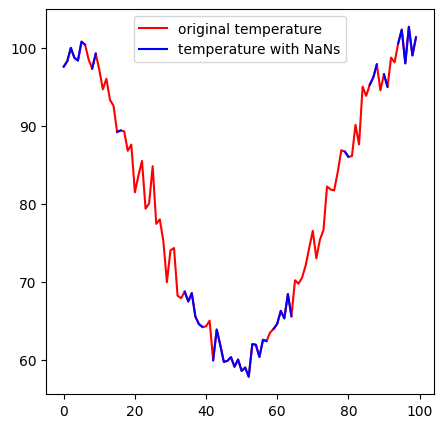

In [8]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(5, 5))
plt.plot(temp, "r-", label="original temperature")
plt.plot(temp_nan, "b-", label="temperature with NaNs")
plt.legend()
plt.show()

<h3 style="text-align:left;">Exercise 4 - Base converter<span style="float: right">2 points</span></h3>

Write a function *int_to_bin* that takes a positive integer as input and returns the binary equivalent of that integer.

You can **not** use built-in methods such as *bin()* in your solution.

In [9]:
def int_to_bin(num):
    bin_num = ""
    while num > 0:
        remainder = num % 2
        bin_num = str(remainder) + bin_num
        num = num // 2
    return bin_num

n = 10
print(f'The binary equivalent of {n} is {int_to_bin(n)}')

The binary equivalent of 10 is 1010


<h3 style="text-align:left;">Exercise 5 - Broadcasting<span style="float: right">2 points</span></h3>

Reshape *a* so it is possible to multiply *a* and *b*, and explain why you had to reshape *a* to be able to multiply the two arrays.

In [10]:
import numpy as np

a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([2, 3])
a = a.reshape(3,2)
a*b

array([[ 2,  6],
       [ 6, 12],
       [10, 18]])

In [11]:
# The initial shape of a is (2, 3), and that of b is (2, ).
# So, for the 1st rule of broadcasting, b will first be reshaped to (1, 2).
# Then, for the second rule, to (2, 2).
# Finally, the two arrays are (2, 3) and (2, 2), they do not match in the 2nd axis, so an error is thrown.

# If we reshape a to (3, 2), b will be reshaped from (1, 2) to (3, 2) and the arrays match.

<h3 style="text-align:left;">Exercise 6 - Moving average<span style="float: right">3 points</span></h3>

Given the array of values, *a*, we can calculate the moving average by averaging nearby values and repeating the procedure sliding along the array. Here's an example of a 3-point moving average (ignoring the edges), with a for loop:

In [12]:
a = np.round(30 + np.random.randn(20) * 2, 1)
print(a)

# Moving average
a_avg = np.zeros_like(a)
# We're just ignoring the edge effects here
for i in range(1, len(a) - 1):
    sub = a[i - 1:i + 2]
    a_avg[i] = sub.mean()
# For the first and last point, we use the original values.
a_avg[[0, -1]] = a[[0, -1]]
print(a_avg)

[35.3 30.8 32.2 29.8 28.7 28.2 33.6 31.3 28.6 31.3 28.5 28.6 30.8 29.4
 31.7 31.9 31.2 29.3 30.7 33.3]
[35.3        32.76666667 30.93333333 30.23333333 28.9        30.16666667
 31.03333333 31.16666667 30.4        29.46666667 29.46666667 29.3
 29.6        30.63333333 31.         31.6        30.8        30.4
 31.1        33.3       ]


Write a function *mov_avg* that takes an array in input and returns its 3-point moving average. You **have to use broadcasting** to compute the moving average. As in the example, use the original array values at the borders.

In [13]:
def mov_avg(arr: np.ndarray) -> np.ndarray:

    arr_avg = np.zeros_like(arr)
    arr_avg[1:-1] = (arr[:-2] + arr[1:-1] + arr[2:]) / 3
    # Fill the borders
    arr_avg[[0, -1]] = arr[[0, -1]].copy()

    return arr_avg

mov_avg(a)

array([35.3       , 32.76666667, 30.93333333, 30.23333333, 28.9       ,
       30.16666667, 31.03333333, 31.16666667, 30.4       , 29.46666667,
       29.46666667, 29.3       , 29.6       , 30.63333333, 31.        ,
       31.6       , 30.8       , 30.4       , 31.1       , 33.3       ])

Solution with "convolve":

In [14]:
def mov_avg(arr: np.ndarray) -> np.ndarray:

    # Define "kernel" of the convolution
    kernel = np.ones(3) / 3
    arr_avg = np.convolve(arr, kernel, mode="same")

    return arr_avg

mov_avg(a)

array([22.03333333, 32.76666667, 30.93333333, 30.23333333, 28.9       ,
       30.16666667, 31.03333333, 31.16666667, 30.4       , 29.46666667,
       29.46666667, 29.3       , 29.6       , 30.63333333, 31.        ,
       31.6       , 30.8       , 30.4       , 31.1       , 21.33333333])

## Broadcasting

### Operations with broadcasting

Broadcasting occurs when arrays of different shapes are used in a binary operation (or an operation involving more than one array).

Rules of broadcasting:

1. If the two arrays differ in dimensions: the shape of the one with fewer dimensions is padded with ones on the leading (left) side

2. If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 is stretched to match the other shape

3. If in any dimension the sizes disagree and neither is equal to 1, an error is raised

In [15]:
# Example: how do the following vectors get broadcasted?

a = np.array([10, 20, 30, 40])
a + 5

array([15, 25, 35, 45])

In [16]:
b = np.array([1, 2, 3, 4, 5])
a + b

ValueError: operands could not be broadcast together with shapes (4,) (5,) 

Three ways of performing the operation in a matrix form:

In [ ]:
# 1)
result = np.empty((5, 4), dtype=int)
for row, valb in enumerate(b):
    for col, vala in enumerate(a):
        result[row, col] = vala + valb
result

array([[11, 21, 31, 41],
       [12, 22, 32, 42],
       [13, 23, 33, 43],
       [14, 24, 34, 44],
       [15, 25, 35, 45]])

In [ ]:
# 2)
aa = np.tile(a, (5, 1))
print(aa)
# Turn b into a column array, then tile it
bb = np.tile(b.reshape(-1, 1), (1, 4))
print(bb)
aa + bb

[[10 20 30 40]
 [10 20 30 40]
 [10 20 30 40]
 [10 20 30 40]
 [10 20 30 40]]
[[1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]
 [4 4 4 4]
 [5 5 5 5]]


array([[11, 21, 31, 41],
       [12, 22, 32, 42],
       [13, 23, 33, 43],
       [14, 24, 34, 44],
       [15, 25, 35, 45]])

In [ ]:
# 3)
a + b.reshape(-1, 1)

array([[11, 21, 31, 41],
       [12, 22, 32, 42],
       [13, 23, 33, 43],
       [14, 24, 34, 44],
       [15, 25, 35, 45]])

## Dataframes and Series

In [ ]:
import pandas as pd

In class you've seen that pandas Series are roughly the equivalent of "indexed 1D arrays" and DataFrames named 2D arrays. Here we review some concepts:

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

As you see, the dtype is float, but we wanted integers. How can we change that?
1. In the definition
2. After creation

We need to use a pandas type to handle the missing values.

In [ ]:
# 1)
s = pd.Series([1, 3, 5, np.nan, 6, 8], dtype=pd.Int16Dtype())
s

0       1
1       3
2       5
3    <NA>
4       6
5       8
dtype: Int16

In [ ]:
# 2)
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s = s.astype("Int64")  # notice the capital letter!
s

0       1
1       3
2       5
3    <NA>
4       6
5       8
dtype: Int64

We can select data as we would with numpy arrays, or using indexes (more later).

In [ ]:
s[1:4]

1       3
2       5
3    <NA>
dtype: Int64

We create a Dataframe with some dates as index:

In [ ]:
dates = pd.date_range("20240308", periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df.head()  # shows first 5 elements

,A,B,C,D
2024-03-08,0.043532,-1.540910,0.384355,-0.373681
2024-03-09,-1.208248,1.131237,1.055119,1.309251
2024-03-10,-1.531093,-1.949059,-0.319814,-0.631922
2024-03-11,0.606094,-0.693686,0.429025,-0.180683
2024-03-12,-1.505344,-0.446588,1.335887,-0.256574


We can also create it with dictionaries (here, we set another column for the dates)

In [ ]:
df = pd.DataFrame(
    {"date": dates,
     "A": np.random.randn(6),
     "B": np.random.randn(6),
     "C": np.random.randn(6),
     "D": list("Python"),
     },
     index=list(range(10,16))
)
df

,date,A,B,C,D
10,2024-03-08,1.243814,1.972789,0.253880,P
11,2024-03-09,-0.742668,-0.316174,1.604010,y
12,2024-03-10,0.292031,0.106674,0.817898,t
13,2024-03-11,-0.530840,-1.593444,-1.366510,h
14,2024-03-12,0.605843,-0.872144,-1.609078,o
15,2024-03-13,-1.897067,-1.119652,0.349075,n


We can check the types also here:

In [ ]:
df.dtypes

date    datetime64[ns]
A              float64
B              float64
C              float64
D               object
dtype: object

and get an overall description and statistics:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 10 to 15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    6 non-null      datetime64[ns]
 1   A       6 non-null      float64       
 2   B       6 non-null      float64       
 3   C       6 non-null      float64       
 4   D       6 non-null      object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 288.0+ bytes


In [ ]:
# Here the "D" column is omitted because it contains strings

df.describe()

,date,A,B,C
count,6,6.000000,6.000000,6.000000
mean,2024-03-10 12:00:00,-0.171481,-0.303659,0.008212
min,2024-03-08 00:00:00,-1.897067,-1.593444,-1.609078
25%,2024-03-09 06:00:00,-0.689711,-1.057775,-0.961413
50%,2024-03-10 12:00:00,-0.119404,-0.594159,0.301477
75%,2024-03-11 18:00:00,0.527390,0.000962,0.700692
max,2024-03-13 00:00:00,1.243814,1.972789,1.604010
std,NaN,1.118497,1.265173,1.255722


It's easy to convert dataframes to arrays (but check the type!)

In [ ]:
# In this case, the whole dataframe is converted to "object" (i.e. strings)
df.to_numpy()

array([[Timestamp('2024-03-08 00:00:00'), -1.0708238801076315,
        0.8890784280392076, 1.5191641720924547, 'P'],
       [Timestamp('2024-03-09 00:00:00'), 1.0056802064777897,
        0.361250763020829, 0.4471366696397221, 'y'],
       [Timestamp('2024-03-10 00:00:00'), -0.19913651812809327,
        1.0018779275910765, 2.205118509227622, 't'],
       [Timestamp('2024-03-11 00:00:00'), 1.1835340831047487,
        -0.9069205564210887, 2.1540705862056773, 'h'],
       [Timestamp('2024-03-12 00:00:00'), 0.8888972759525614,
        -1.728246572099404, 0.4220968291161689, 'o'],
       [Timestamp('2024-03-13 00:00:00'), 1.469616405515086,
        0.9787525574891169, -0.01764950176333313, 'n']], dtype=object)

You can also access the array underlying the data with:

In [ ]:
df.index.array

<NumpyExtensionArray>
[10, 11, 12, 13, 14, 15]
Length: 6, dtype: int64

In [ ]:
df["A"].array

<NumpyExtensionArray>
[ 1.2438136895499694, -0.7426683263479035,  0.2920307187328238,
 -0.5308396776562336,    0.60584265367883,  -1.897066855497965]
Length: 6, dtype: float64

**NB: there's a difference in the axes order from arrays to dataframes!** If you slice on the first axis of dataframes, a column will be selected. This is not the case for arrays (the row will be selected):

In [ ]:
df = pd.DataFrame(np.random.rand(2, 3), columns=[0, 1, 2])
print(df)
print(df[0])
print(df.to_numpy()[0])

          0         1         2
0  0.442115  0.055197  0.130673
1  0.259658  0.200377  0.888100
0    0.442115
1    0.259658
Name: 0, dtype: float64
[0.44211528 0.05519661 0.13067258]


### Indexing

.loc, .iloc work the same on the dataframe, just on indexes or names:

In [ ]:
dates = pd.date_range("20240308", periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))

print(df.iloc[:3, 1:])
print(df.loc["20240308":"20240310", "B":])

                   B         C         D
2024-03-08  0.916503 -0.457574  0.586062
2024-03-09 -1.403948  0.222009 -1.002918
2024-03-10  0.159640 -0.813212  0.340981
                   B         C         D
2024-03-08  0.916503 -0.457574  0.586062
2024-03-09 -1.403948  0.222009 -1.002918
2024-03-10  0.159640 -0.813212  0.340981


### Boolean masking

In [ ]:
df

,A,B,C,D
2024-03-08,0.500879,0.916503,-0.457574,0.586062
2024-03-09,-1.375420,-1.403948,0.222009,-1.002918
2024-03-10,0.622052,0.159640,-0.813212,0.340981
2024-03-11,0.669554,-0.729702,-0.239082,-0.831068
2024-03-12,2.080357,-0.515238,-1.669644,-0.726219
2024-03-13,-0.472521,-1.904856,2.587367,1.772962


In [ ]:
df[df["A"] > 0]

,A,B,C,D
2024-03-08,0.500879,0.916503,-0.457574,0.586062
2024-03-10,0.622052,0.159640,-0.813212,0.340981
2024-03-11,0.669554,-0.729702,-0.239082,-0.831068
2024-03-12,2.080357,-0.515238,-1.669644,-0.726219


In [ ]:
df[df > 0]

,A,B,C,D
2024-03-08,0.500879,0.916503,NaN,0.586062
2024-03-09,NaN,NaN,0.222009,NaN
2024-03-10,0.622052,0.159640,NaN,0.340981
2024-03-11,0.669554,NaN,NaN,NaN
2024-03-12,2.080357,NaN,NaN,NaN
2024-03-13,NaN,NaN,2.587367,1.772962


*isin* method:

In [ ]:
df["E"] = ["one", "one", "two", "three", "four", "three"]
df

,A,B,C,D,E
2024-03-08,0.500879,0.916503,-0.457574,0.586062,one
2024-03-09,-1.375420,-1.403948,0.222009,-1.002918,one
2024-03-10,0.622052,0.159640,-0.813212,0.340981,two
2024-03-11,0.669554,-0.729702,-0.239082,-0.831068,three
2024-03-12,2.080357,-0.515238,-1.669644,-0.726219,four
2024-03-13,-0.472521,-1.904856,2.587367,1.772962,three


In [ ]:
df[df["E"].isin(["two", "four"])]

,A,B,C,D,E
2024-03-10,0.622052,0.159640,-0.813212,0.340981,two
2024-03-12,2.080357,-0.515238,-1.669644,-0.726219,four


### Broadcasting

When performing binary operations on pandas DataFrames, the input objects are matched for index and columns. For example:

In [ ]:
df = pd.DataFrame(np.arange(12).reshape(4, 3), index=["a", "b", "c", "d"], columns=["one", "two", "three"])

df

,one,two,three
a,0,1,2
b,3,4,5
c,6,7,8
d,9,10,11


In [ ]:
row = df.loc["b"]
col = df.loc[:, "two"]

df.sub(row, axis="columns")  # or, axis=1

,one,two,three
a,-3,-3,-3
b,0,0,0
c,3,3,3
d,6,6,6


In [ ]:
df.sub(col, axis="index")  # or, axis=0

,one,two,three
a,-1,0,1
b,-1,0,1
c,-1,0,1
d,-1,0,1


What happens with another dataframe?

In [ ]:
df2 = pd.DataFrame(
    {
        "one": pd.Series(np.full(4, 1), index=["a", "b", "c", "d"]),
        "two": pd.Series(np.full(4, 2), index=["a", "b", "c", "d"]),
        "three": pd.Series(np.full(4, 3), index=["a", "b", "c", "d"]),
    }
)

df2

,one,two,three
a,1,2,3
b,1,2,3
c,1,2,3
d,1,2,3


When the other dataframe has the same rows and columns, the result is the same as with numpy arrays:

In [ ]:
df.sub(df2)

,one,two,three
a,-1,-1,-1
b,2,2,2
c,5,5,5
d,8,8,8


However, if the rows/columns are different, the resulting dataframe will have the union of the rows/columns of the original dataframes:

In [ ]:
# Here we have a different row, "e" instead of "a", and a different column, "four"

df3 = pd.DataFrame(   
    {
        "one": pd.Series(np.full(4, 1), index=["b", "c", "d", "e"]),
        "two": pd.Series(np.full(4, 2), index=["b", "c", "d", "e"]),
        "three": pd.Series(np.full(4, 3), index=["b", "c", "d", "e"]),
        "four": pd.Series(np.full(4, 4), index=["b", "c", "d", "e"]),
    }
)

df.sub(df3)

,four,one,three,two
a,NaN,NaN,NaN,NaN
b,NaN,2.0,2.0,2.0
c,NaN,5.0,5.0,5.0
d,NaN,8.0,8.0,8.0
e,NaN,NaN,NaN,NaN


**NB**: here the operation is executed only on matching index/column, but the resulting dataframe has all the keys! This is different for numpy arrays, where two arrays of the same shape are always compared element-wise.